In [51]:
import numpy as np
import pandas as pd # Operaciones con dataframes
from matplotlib import pyplot as plt # gráficos
from statsmodels.tsa.seasonal import seasonal_decompose # descomposición de series
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # Holwinters simple
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holwinters doble y tripe
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error

In [52]:
url = "https://raw.githubusercontent.com/jorgelizarazo94/Fundamentos_2/2b68b4cbdd3a0ff30c1442d9226ec50ec2d4970e/Parcial_1_timeseries/Examen.csv"
df = pd.read_csv(url)


In [53]:

df.rename(columns={"Unnamed: 0": "ID"}, inplace=True)
df['Fecha'] = pd.date_range(start="2008-01-01", periods=len(df), freq='MS')
df.set_index('Fecha', inplace=True)


In [54]:
df

,ID,producto1,producto2
Fecha,,,
2008-01-01,1,4000.000000,3000.000000
2008-02-01,2,3997.400893,3010.686220
2008-03-01,3,3978.605317,3022.018584
2008-04-01,4,3986.454125,3033.920990
2008-05-01,5,3979.695678,3038.402098
...,...,...,...
2018-03-01,123,3664.610771,3429.293034
2018-04-01,124,3650.881839,3437.099467
2018-05-01,125,3651.788470,3453.155282


Producto
1. Modelo: HW Multiplicative - RMSE global: 20.83
2. Modelo: HW Multiplicative - RMSE global: 32.22



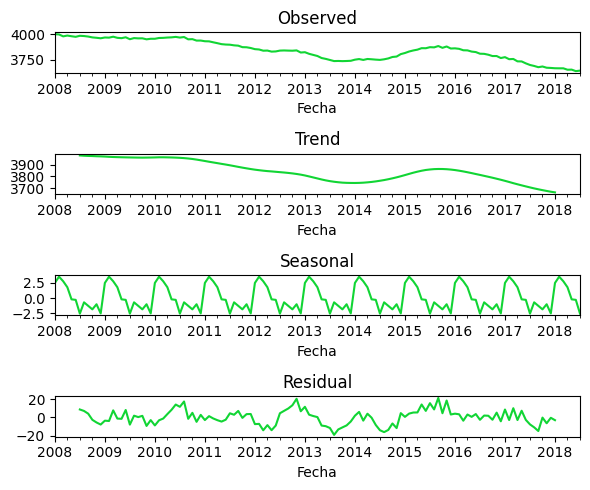

In [55]:
td_componentes = seasonal_decompose(df[["producto1"]], model="additive")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(6,5))

td_componentes.observed.plot(ax=ax1, color='#11D534')
td_componentes.trend.plot(ax=ax2, color='#11D534')
td_componentes.seasonal.plot(ax=ax3, color='#11D534')
td_componentes.resid.plot(ax=ax4, color='#11D534')
ax1.set_title("Observed")
ax2.set_title("Trend")
ax3.set_title("Seasonal")
ax4.set_title("Residual")

fig.tight_layout()
plt.show()

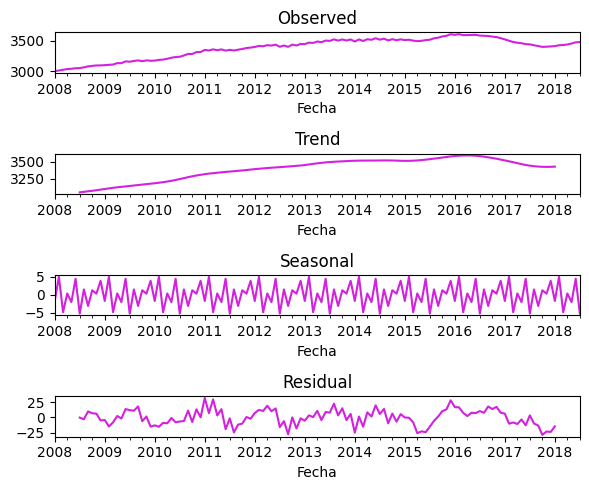

In [56]:
# Realizar la descomposición estacional
td_componentes2 = seasonal_decompose(df[["producto2"]], model="additive")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(6,5))

td_componentes2.observed.plot(ax=ax1, color='#D321DF')
td_componentes2.trend.plot(ax=ax2,color='#D321DF')
td_componentes2.seasonal.plot(ax=ax3, color='#D321DF')
td_componentes2.resid.plot(ax=ax4, color='#D321DF')
ax1.set_title("Observed")
ax2.set_title("Trend")
ax3.set_title("Seasonal")
ax4.set_title("Residual")

fig.tight_layout()
plt.show()

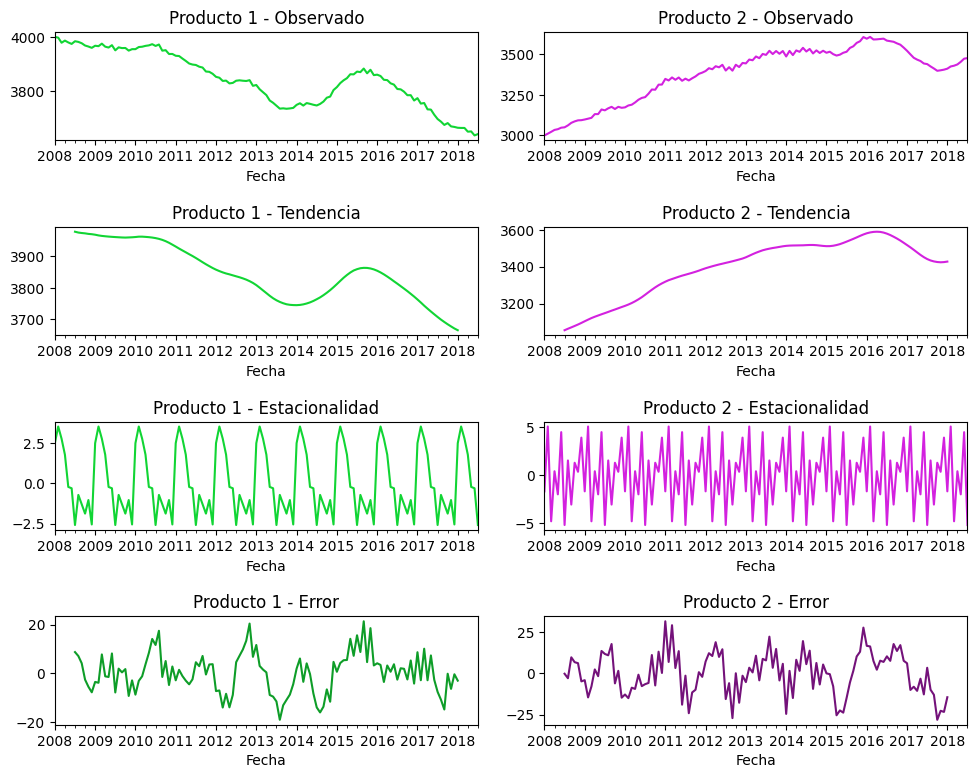

In [68]:

# Descomposición estacional para producto1
td_componentes = seasonal_decompose(df[["producto1"]], model="additive")

# Descomposición estacional para producto2
td_componentes2 = seasonal_decompose(df[["producto2"]], model="additive")

# Crear subtramas con 4 filas y 2 columnas con un tamaño más compacto
fig, axes = plt.subplots(4, 2, figsize=(10, 8))

# Producto 1
td_componentes.observed.plot(ax=axes[0, 0], color='#11D534')
td_componentes.trend.plot(ax=axes[1, 0], color='#11D534')
td_componentes.seasonal.plot(ax=axes[2, 0], color='#11D534')
td_componentes.resid.plot(ax=axes[3, 0], color='#0E9D28')
axes[0, 0].set_title("Producto 1 - Observado")
axes[1, 0].set_title("Producto 1 - Tendencia")
axes[2, 0].set_title("Producto 1 - Estacionalidad")
axes[3, 0].set_title("Producto 1 - Error")

# Producto 2
td_componentes2.observed.plot(ax=axes[0, 1], color='#D321DF')
td_componentes2.trend.plot(ax=axes[1, 1], color='#D321DF')
td_componentes2.seasonal.plot(ax=axes[2, 1], color='#D321DF')
td_componentes2.resid.plot(ax=axes[3, 1], color='#74127A')
axes[0, 1].set_title("Producto 2 - Observado")
axes[1, 1].set_title("Producto 2 - Tendencia")
axes[2, 1].set_title("Producto 2 - Estacionalidad")
axes[3, 1].set_title("Producto 2 - Error")

# Ajustar layout y guardar imagen
fig.tight_layout(pad=1.5)
plt.savefig('Methods.png', dpi=300)
plt.show()

In [ ]:
prod1= df[['producto1']]
prod1

,producto1
Fecha,
2008-01-01,4000.000000
2008-02-01,3997.400893
2008-03-01,3978.605317
2008-04-01,3986.454125
2008-05-01,3979.695678
...,...
2018-03-01,3664.610771
2018-04-01,3650.881839
2018-05-01,3651.788470


In [ ]:
prod2= df[['producto2']]
prod2

,producto2
Fecha,
2008-01-01,3000.000000
2008-02-01,3010.686220
2008-03-01,3022.018584
2008-04-01,3033.920990
2008-05-01,3038.402098
...,...
2018-03-01,3429.293034
2018-04-01,3437.099467
2018-05-01,3453.155282


In [ ]:
ets_model = ETSModel(endog=prod1["producto1"],error="add",trend='add', seasonal='mul',
                     seasonal_periods=6)
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(6)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds_hw_mul = pd.concat([limits, conf_forecast], axis = 1)
preds_hw_mul.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_hw_mul)



            Point_forecast     lower_95     upper_95
2018-08-01     3635.043744  3619.530426  3650.374008
2018-09-01     3629.294708  3606.161369  3650.369814
2018-10-01     3624.175985  3592.112169  3657.353607
2018-11-01     3619.301714  3571.595766  3661.650145
2018-12-01     3613.543552  3549.568793  3669.379808
2019-01-01     3610.995208  3529.875623  3684.576293


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


-154.70067000000017

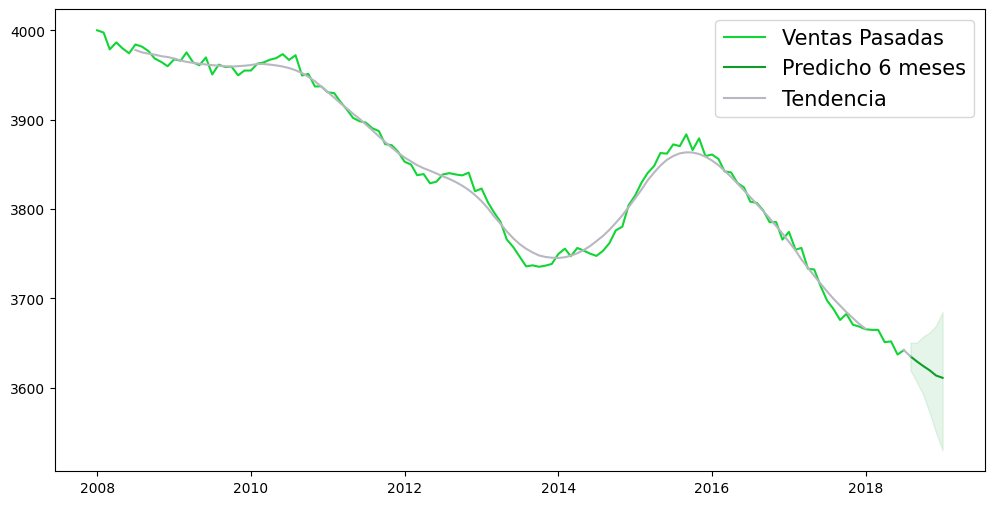

In [ ]:
last_df_x = prod1.index[-1]
last_df_y = prod1.iloc[-1]
first_preds_x = preds_hw_mul.index[0]
first_preds_y = preds_hw_mul['Point_forecast'].iloc[0]

fig = plt.figure(figsize=(12, 6))
plt.plot(prod1,label="Ventas Pasadas", color='#11D534')
plt.plot(preds_hw_mul['Point_forecast'],
         label="Predicho 6 meses", color='#0E9D28')
plt.fill_between(preds_hw_mul.index ,preds_hw_mul['lower_95'], preds_hw_mul['upper_95'], color='#0E9D28', alpha=0.1)
plt.plot([last_df_x, first_preds_x], [last_df_y, first_preds_y], color='#B7B8C1', linestyle='-')
plt.plot(td_componentes.trend, color='#B7B8C1', label="Tendencia")

plt.legend(fontsize=15)



plt.savefig('First_grapproducto_2.png', dpi=300, transparent=True)



plt.show()


In [ ]:
ets_model = ETSModel(endog=prod2["producto2"],error="add",trend='add', seasonal='mul',
                     seasonal_periods=6)
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(6)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds_hw_mul2 = pd.concat([limits, conf_forecast], axis = 1)
preds_hw_mul2.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_hw_mul2)



            Point_forecast     lower_95     upper_95
2018-08-01     3495.183314  3470.122483  3520.306725
2018-09-01     3502.071250  3465.859903  3540.164796
2018-10-01     3520.412561  3468.761144  3577.722206
2018-11-01     3532.351078  3457.578912  3607.861331
2018-12-01     3551.184192  3457.530342  3652.364661
2019-01-01     3556.875228  3439.717076  3685.113266


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


-245.39618999999993

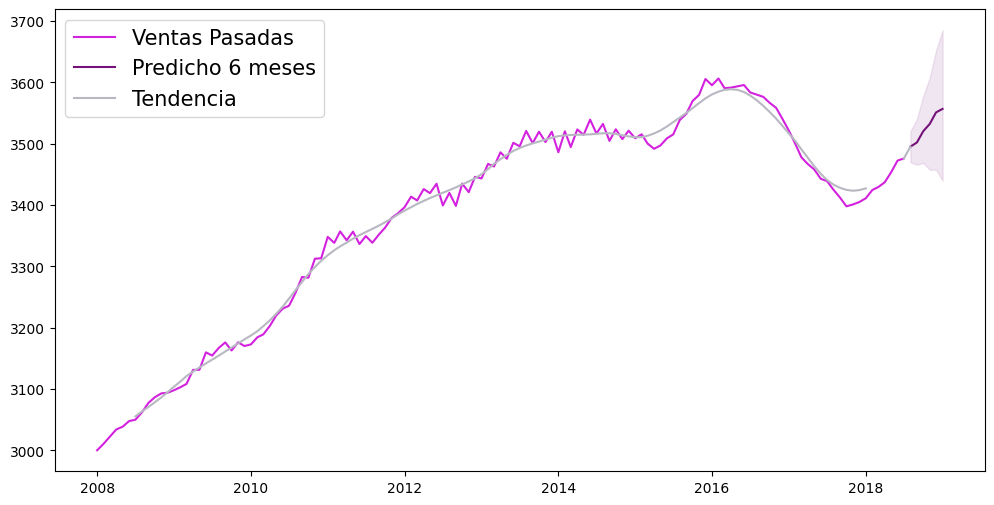

In [ ]:
last_df_x = prod2.index[-1]
last_df_y = prod2.iloc[-1]
first_preds_x = preds_hw_mul2.index[0]
first_preds_y = preds_hw_mul2['Point_forecast'].iloc[0]

fig = plt.figure(figsize=(12, 6))
plt.plot(prod2,label="Ventas Pasadas", color='#D321DF')
plt.plot(preds_hw_mul2['Point_forecast'],
         label="Predicho 6 meses", color='#74127A')
plt.fill_between(preds_hw_mul2.index ,preds_hw_mul2['lower_95'], preds_hw_mul2['upper_95'], color='#74127A', alpha=0.1)
plt.plot([last_df_x, first_preds_x], [last_df_y, first_preds_y], color='#B7B8C1', linestyle='-')
plt.plot(td_componentes2.trend, color='#B7B8C1', label="Tendencia")

plt.legend(fontsize=15)



plt.savefig('Second_grapproducto_2.png', dpi=300, transparent=True)



plt.show()


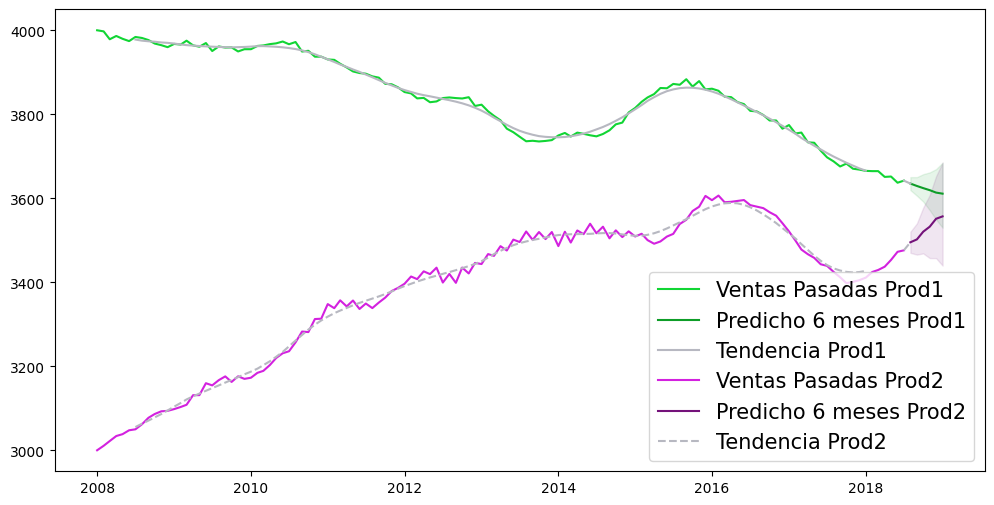

In [ ]:

last_df_x_prod1 = prod1.index[-1]
last_df_y_prod1 = prod1.iloc[-1]
first_preds_x_prod1 = preds_hw_mul.index[0]
first_preds_y_prod1 = preds_hw_mul['Point_forecast'].iloc[0]


last_df_x_prod2 = prod2.index[-1]
last_df_y_prod2 = prod2.iloc[-1]
first_preds_x_prod2 = preds_hw_mul2.index[0]
first_preds_y_prod2 = preds_hw_mul2['Point_forecast'].iloc[0]


fig = plt.figure(figsize=(12, 6))


plt.plot(prod1, label="Ventas Pasadas Prod1", color='#11D534')
plt.plot(preds_hw_mul['Point_forecast'], label="Predicho 6 meses Prod1", color='#0E9D28')
plt.fill_between(preds_hw_mul.index, preds_hw_mul['lower_95'], preds_hw_mul['upper_95'], color='#0E9D28', alpha=0.1)
plt.plot([last_df_x_prod1, first_preds_x_prod1], [last_df_y_prod1, first_preds_y_prod1], color='#B7B8C1', linestyle='-')
plt.plot(td_componentes.trend, color='#B7B8C1', label="Tendencia Prod1")
# Plotting for product 2
plt.plot(prod2, label="Ventas Pasadas Prod2", color='#D321DF')
plt.plot(preds_hw_mul2['Point_forecast'], label="Predicho 6 meses Prod2", color='#74127A')
plt.fill_between(preds_hw_mul2.index, preds_hw_mul2['lower_95'], preds_hw_mul2['upper_95'], color='#74127A', alpha=0.1)
plt.plot([last_df_x_prod2, first_preds_x_prod2], [last_df_y_prod2, first_preds_y_prod2], color='#B7B8C1', linestyle='--')
# I assumed you want the trend of prod2 as well, if not, remove this line.
plt.plot(td_componentes2.trend, color='#B7B8C1', linestyle='--', label="Tendencia Prod2")

plt.legend(fontsize=15)
plt.savefig('Combined_grapproducto.png', dpi=300, transparent=True)
plt.show()

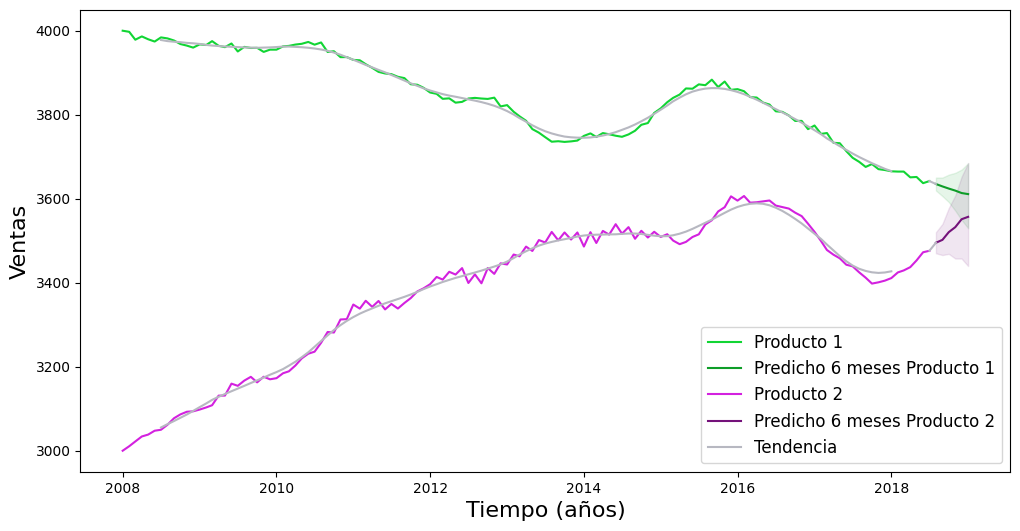

In [ ]:
import matplotlib.pyplot as plt

# Extract data points for product 1
last_df_x_prod1 = prod1.index[-1]
last_df_y_prod1 = prod1.iloc[-1]
first_preds_x_prod1 = preds_hw_mul.index[0]
first_preds_y_prod1 = preds_hw_mul['Point_forecast'].iloc[0]

# Extract data points for product 2
last_df_x_prod2 = prod2.index[-1]
last_df_y_prod2 = prod2.iloc[-1]
first_preds_x_prod2 = preds_hw_mul2.index[0]
first_preds_y_prod2 = preds_hw_mul2['Point_forecast'].iloc[0]

# Create a combined figure and plot data for both products
fig = plt.figure(figsize=(12, 6))

# Plotting for product 1
plt.plot(prod1, label="Producto 1", color='#11D534')
plt.plot(preds_hw_mul['Point_forecast'], label="Predicho 6 meses Producto 1", color='#0E9D28')
plt.fill_between(preds_hw_mul.index, preds_hw_mul['lower_95'], preds_hw_mul['upper_95'], color='#0E9D28', alpha=0.1)
plt.plot([last_df_x_prod1, first_preds_x_prod1], [last_df_y_prod1, first_preds_y_prod1], color='#B7B8C1', linestyle='-')

# Plotting for product 2
plt.plot(prod2, label="Producto 2", color='#D321DF')
plt.plot(preds_hw_mul2['Point_forecast'], label="Predicho 6 meses Producto 2", color='#74127A')
plt.fill_between(preds_hw_mul2.index, preds_hw_mul2['lower_95'], preds_hw_mul2['upper_95'], color='#74127A', alpha=0.1)
plt.plot([last_df_x_prod2, first_preds_x_prod2], [last_df_y_prod2, first_preds_y_prod2], color='#B7B8C1', linestyle='-')


plt.plot(td_componentes.trend, color='#B7B8C1', label="Tendencia")
plt.plot(td_componentes2.trend, color='#B7B8C1', label="")
plt.xlabel('Tiempo (años)', fontsize=16)
plt.ylabel('Ventas', fontsize=16)

plt.legend(fontsize=12)
plt.savefig('Combined_grapproducto.png', dpi=300, transparent=True)
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
<ipython-input-48-a66deb40340a>:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Ajusta el diseño para evitar recortes


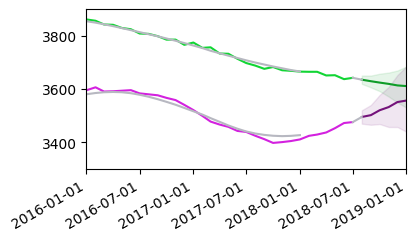

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

fig = plt.figure(figsize=(8, 4))  # Tamaño más pequeño
ax = fig.add_axes([0.55, 0.15, 0.4, 0.4])  # [left, bottom, width, height]

# Plotting for product 1
plt.plot(prod1, label="Ventas Pasadas Prod1", color='#11D534')
plt.plot(preds_hw_mul['Point_forecast'], label="Predicho 6 meses Prod1", color='#0E9D28')
plt.fill_between(preds_hw_mul.index, preds_hw_mul['lower_95'], preds_hw_mul['upper_95'], color='#0E9D28', alpha=0.1)
plt.plot([last_df_x_prod1, first_preds_x_prod1], [last_df_y_prod1, first_preds_y_prod1], color='#B7B8C1', linestyle='-')

# Plotting for product 2
plt.plot(prod2, label="Ventas Pasadas Prod2", color='#D321DF')
plt.plot(preds_hw_mul2['Point_forecast'], label="Predicho 6 meses Prod2", color='#74127A')
plt.fill_between(preds_hw_mul2.index, preds_hw_mul2['lower_95'], preds_hw_mul2['upper_95'], color='#74127A', alpha=0.1)
plt.plot([last_df_x_prod2, first_preds_x_prod2], [last_df_y_prod2, first_preds_y_prod2], color='#B7B8C1', linestyle='-')

# Tendencia común para ambos productos
plt.plot(td_componentes.trend, color='#B7B8C1', label="Tendencia")
plt.plot(td_componentes2.trend, color='#B7B8C1', label="")

# Ajusta el rango del eje x para mostrar datos desde 2016 hasta 2020
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2020-12-31')
ax.set_xlim(start_date, preds_hw_mul.index[-1])

months_locator = mdates.MonthLocator(bymonthday=1, interval=6)
date_format = mdates.DateFormatter('%Y-%m-%d')

ax.xaxis.set_major_locator(months_locator)
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

# Aquí estoy asumiendo un rango y-limit basado en el código anterior, ajusta según tus necesidades
ax.set_ylim(3300, 3900)

plt.tight_layout()  # Ajusta el diseño para evitar recortes
plt.savefig('Combined_Zoom.png', dpi=300, transparent=True)
plt.show()